In [ ]:
#IMPORTING ALL THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
data = pd.read_excel(r"C:\Users\Admin\OneDrive\Desktop\Machine Learning AI Bioinforma Banner\BINF-5507-MACHINE-LEARNING-AI-\Assignment4\Data\RADCURE_Clinical_v04_20241219.xlsx")
data.columns = data.columns.str.strip().str.lower()

# summary
print(data.shape)
print(data.columns)
print(data.head())


(3346, 34)
Index(['patient_id', 'age', 'sex', 'ecog ps', 'smoking py', 'smoking status',
       'ds site', 'subsite', 't', 'n', 'm', 'stage', 'path', 'hpv',
       'tx modality', 'chemo', 'rt start', 'dose', 'fx', 'last fu', 'status',
       'length fu', 'date of death', 'cause of death', 'local', 'date local',
       'regional', 'date regional', 'distant', 'date distant', '2nd ca',
       'date 2nd ca', 'radcure-challenge', 'contrastenhanced'],
      dtype='object')
     patient_id   age     sex ecog ps smoking py smoking status     ds site  \
0  RADCURE-0005  62.6  Female  ECOG 0         50      Ex-smoker  Oropharynx   
1  RADCURE-0006  87.3    Male  ECOG 2         25      Ex-smoker      Larynx   
2  RADCURE-0007  49.9    Male  ECOG 1         15      Ex-smoker  Oropharynx   
3  RADCURE-0009  72.3    Male  ECOG 1         30      Ex-smoker     Unknown   
4  RADCURE-0010  59.7  Female  ECOG 0          0     Non-smoker  Oropharynx   

           subsite    t    n  ... local date local re

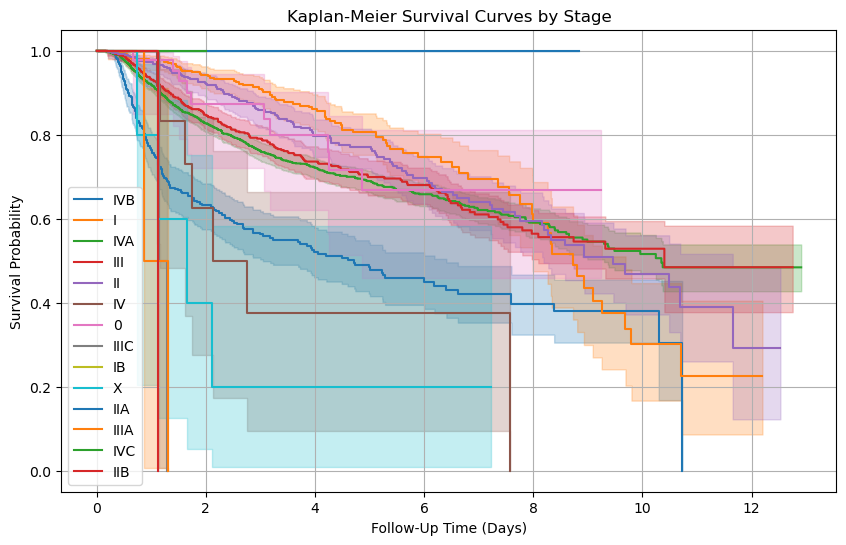

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for stage in data["stage"].dropna().unique():
    stage_data = data[data["stage"] == stage]
    kmf.fit(stage_data["length fu"], event_observed=stage_data["status"], label=str(stage))
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves by Stage")
plt.xlabel("Follow-Up Time (Days)")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()




In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

file_path = r"C:\Users\Admin\OneDrive\Desktop\Machine Learning AI Bioinforma Banner\BINF-5507-MACHINE-LEARNING-AI-\Assignment4\Data\RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path)

import pandas as pd
from lifelines import CoxPHFitter

# Load Excel file
file_path = r"C:\Users\Admin\OneDrive\Desktop\Machine Learning AI Bioinforma Banner\BINF-5507-MACHINE-LEARNING-AI-\Assignment4\Data\RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path)

# Clean column names
data.columns = data.columns.str.strip().str.lower()

data["status"] = data["status"].astype(str).str.strip().str.lower().map({"dead": 1, "alive": 0})

# Keep only needed columns and drop missing/invalid rows
df = data[["length fu", "status", "age", "stage", "tx modality"]].copy()
df = df.dropna()
df = df[df["length fu"] > 0]

df = pd.get_dummies(df, columns=["stage", "tx modality"], drop_first=True)

# Fit Cox model
cph = CoxPHFitter()
cph.fit(df, duration_col="length fu", event_col="status")

# Print plain summary
print(cph.summary)


                                  coef     exp(coef)      se(coef)  \
covariate                                                            
age                           0.036090  1.036749e+00      0.003187   
stage_I                      -0.208375  8.119029e-01      0.335858   
stage_IB                    -16.960320  4.307512e-08  22465.816872   
stage_II                      0.070716  1.073276e+00      0.330256   
stage_IIA                   -11.206784  1.358175e-05    589.409623   
stage_IIB                     2.150744  8.591251e+00      1.050522   
stage_III                     0.452482  1.572210e+00      0.325298   
stage_IIIA                    2.798102  1.641346e+01      0.777693   
stage_IIIC                    2.728403  1.530842e+01      0.775767   
stage_IV                      1.151333  3.162405e+00      0.494843   
stage_IVA                     0.775677  2.172062e+00      0.321031   
stage_IVB                     1.577581  4.843227e+00      0.328441   
stage_IVC           

Accuracy: 0.6099397590361446

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       432
           1       0.42      0.32      0.36       232

    accuracy                           0.61       664
   macro avg       0.55      0.54      0.54       664
weighted avg       0.59      0.61      0.59       664



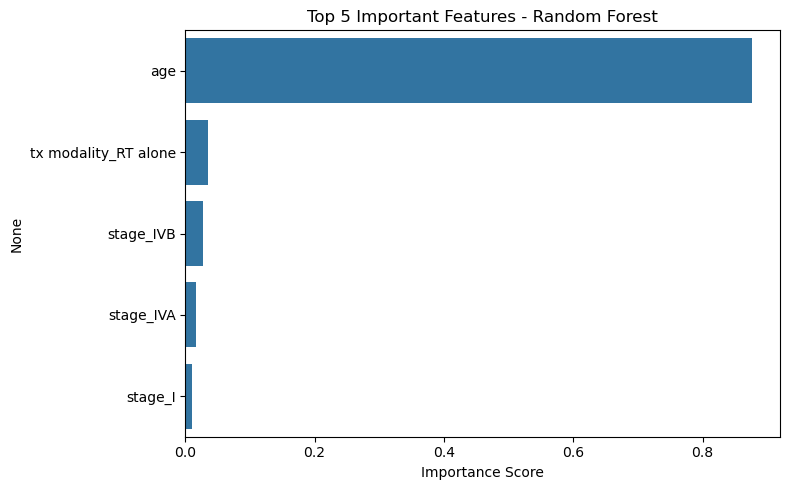

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Excel file
file_path = r"C:\Users\Admin\OneDrive\Desktop\Machine Learning AI Bioinforma Banner\BINF-5507-MACHINE-LEARNING-AI-\Assignment4\Data\RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path)

# Clean column names
data.columns = data.columns.str.strip().str.lower()

data["status"] = data["status"].astype(str).str.strip().str.lower().map({"dead": 1, "alive": 0})

# Selecting
df = data[["status", "age", "stage", "tx modality"]].dropna()
df = pd.get_dummies(df, columns=["stage", "tx modality"], drop_first=True)

# Split features and target
X = df.drop("status", axis=1)
y = df["status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Top 5 important
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 5 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import pandas as pd

# Loading the data 
file_path = r"C:\Users\Admin\OneDrive\Desktop\Machine Learning AI Bioinforma Banner\BINF-5507-MACHINE-LEARNING-AI-\Assignment4\Data\RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path)
data.columns = data.columns.str.strip().str.lower()
data["status"] = data["status"].astype(str).str.strip().str.lower().map({"dead": 1, "alive": 0})

# Keeping only the necessary columns
df = data[["status", "age", "stage", "tx modality", "length fu"]].dropna()
df = df[df["length fu"] > 0]

df = df.rename(columns={"length fu": "survival_time"})
df = pd.get_dummies(df, columns=["stage", "tx modality"], drop_first=True)

# Saving
cox_training_data = df.copy()

# Fit Cox model
cph = CoxPHFitter()
cph.fit(cox_training_data, duration_col="survival_time", event_col="status")
X_cox = cox_training_data.drop(columns=["survival_time", "status"])
cox_pred = cph.predict_partial_hazard(X_cox)

cox_c_index = concordance_index(cox_training_data["survival_time"], -cox_pred, cox_training_data["status"])
print("Cox Concordance Index:", cox_c_index)





Cox Concordance Index: 0.6988828987723399
